In [1]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [2]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
    from math import exp
    fitness=np.zeros((len(p),1))
    for i in range(len(p)):
        x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
        fitness[i,0] = 2 * x * z * exp(-x) - 2 * pow(y, 3) + pow(y, 2) - 3 * pow(z, 3)
    return fitness

In [3]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [4]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [5]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [6]:
import numpy as np
from random import randint

num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[-18.24740474  37.62557608  28.85764726]
 [-14.73216687   4.40027685 -35.62348192]
 [ 21.42257989  92.35560262 -28.68217162]
 [-27.3478704  -55.27926645 -20.72998939]
 [ 48.1828225    6.37919377  35.63507013]
 [-80.01515642  33.47369581 -69.48901471]
 [-41.5529747  -13.50473362 -37.76537091]
 [-52.00540107  45.40476979  33.62297956]
 [-55.97638006 -66.18090091 -74.43108157]
 [ 41.73287106 -81.4871947   -7.13042787]
 [ 55.22206923  37.13636238 -94.5699852 ]
 [-15.6241042  -74.22033564 -38.77824443]
 [ 71.81627608 -21.42767018  -7.0902395 ]
 [-92.80374996 -46.0890287   75.46418459]
 [ 31.64454913  -1.28319786  42.96053254]
 [-22.00704873  68.3042561   -1.36694023]
 [-34.0827688  -82.35747252 -88.55932551]
 [-55.71198994  23.664249   -63.79188201]
 [ 55.03681111  66.48787298 -48.77080942]
 [-11.0230127  -83.77730967 -31.95233219]
 [  7.55199737  58.90290961 -75.07529185]
 [  5.07217611  96.95239218 -54.9922842 ]
 [ 42.14390763  52.69259557  49.22470467]
 [-47.14750731  26.24785062  23.59

C:\Users\micha\AppData\Local\Temp\ipykernel_11428\4059749975.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value


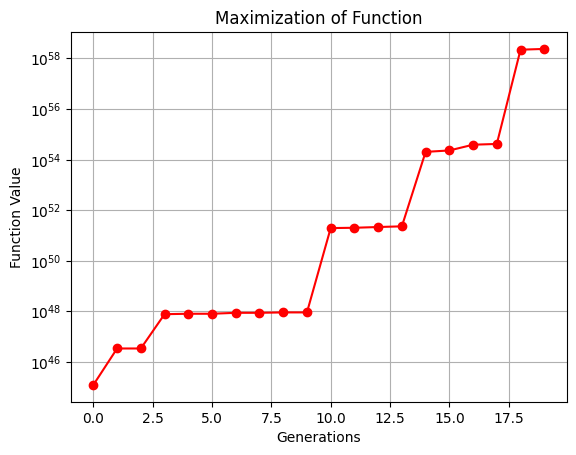

In [7]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()